In [30]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns

In [31]:
# I know this is hacky - what is the best option to have custom paths in jupyter notebooks? Or should we
# move the benchmark .csv files eventually in this folder?
data_folder: Path = Path("/Users/linusheinzl/Downloads")
benchmark_speed_file: Path = data_folder / "benchmark_results.csv"
benchmark_compression_file: Path = data_folder / "bits_per_int.csv"
sns.set(rc={'figure.figsize':(20,16)})

## Preprocessing

In [32]:
benchmark_speeds: DataFrame = pd.read_csv(benchmark_speed_file)
benchmark_speeds = benchmark_speeds.loc[~benchmark_speeds["name"].str.contains("write_BitsPerInt")]
benchmark_speeds["input_data"] = [name.split("get_with_")[1] for name in benchmark_speeds["name"]]
benchmark_speeds["library"] = [name.split("/")[1].split("_benchmark")[0] for name in benchmark_speeds["name"]]
benchmark_speeds["process_type"] = [name.split("_benchmark_")[1].split("_get")[0] for name in benchmark_speeds["name"]]

# When we display all codecs, the plots get a bit full and messy. So we can filter them a bit
# and just display the codecs we want to see at the moment
filtered_fast_pfor_codecs: DataFrame = benchmark_speeds.loc[~(benchmark_speeds["library"].str.contains("fastPFOR"))]
only_fast_pfor: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].str.contains("fastPFOR"))]
most_interesting_libraries: List[str] = ["turboPFOR_direct", "turboPFOR", "sdsl_lite_dac_vector", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking", "maskedVByte"]
limited_to_interesting_libs: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].isin(most_interesting_libraries))]
dataset_filtered: DataFrame = limited_to_interesting_libs

## Encoding

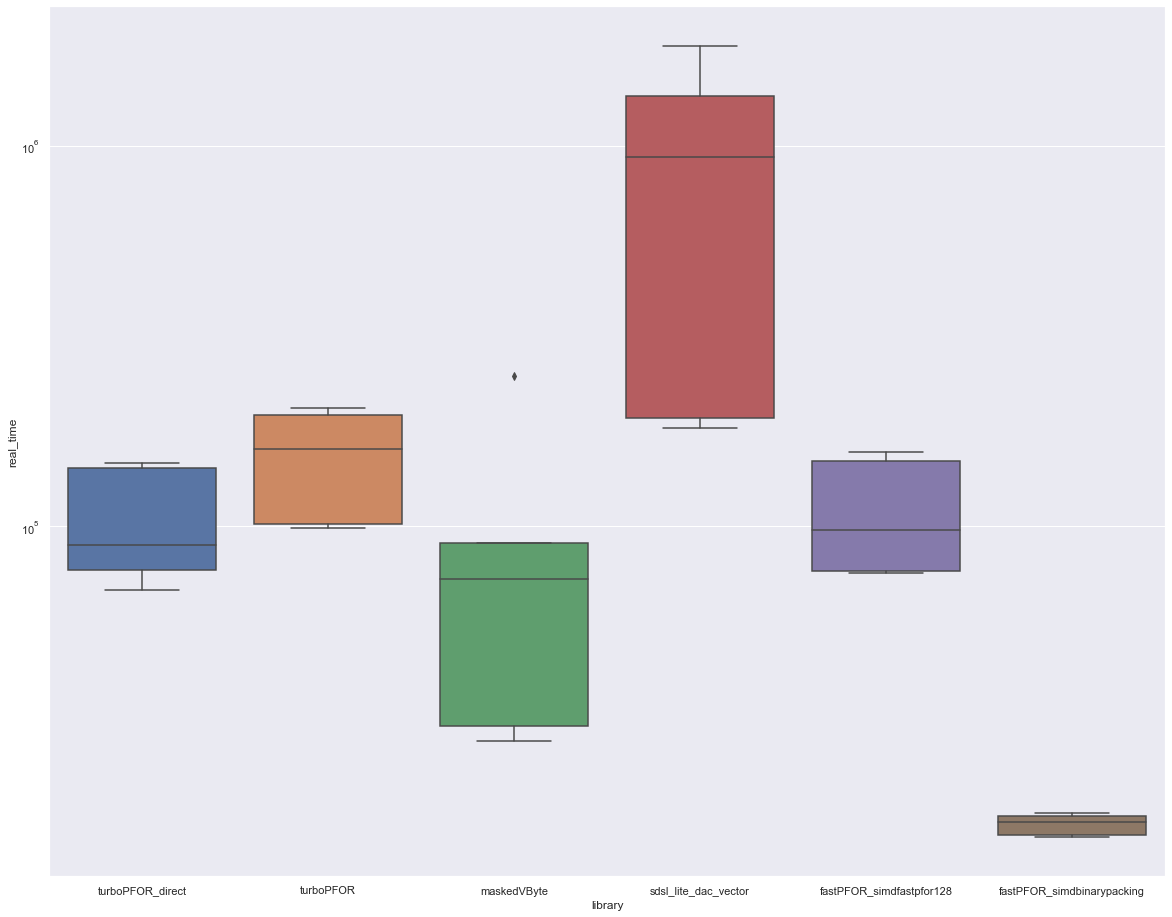

In [33]:
encoding: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="real_time")
plot.set_yscale("log")

## Decoding

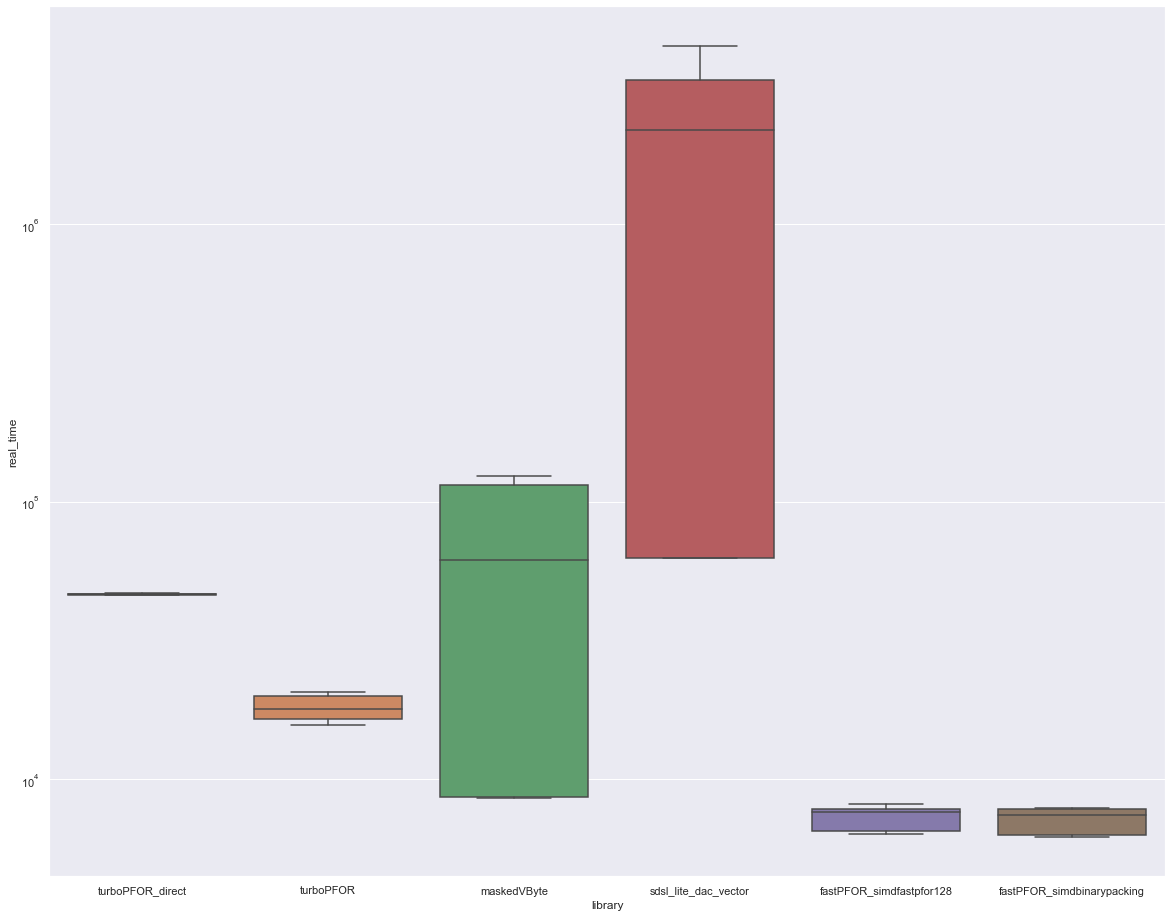

In [34]:
decoding: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "decoding"]
plot: sns.boxplot = sns.boxplot(data=decoding, x="library", y="real_time")
plot.set_yscale("log")

## Decoding Point Based

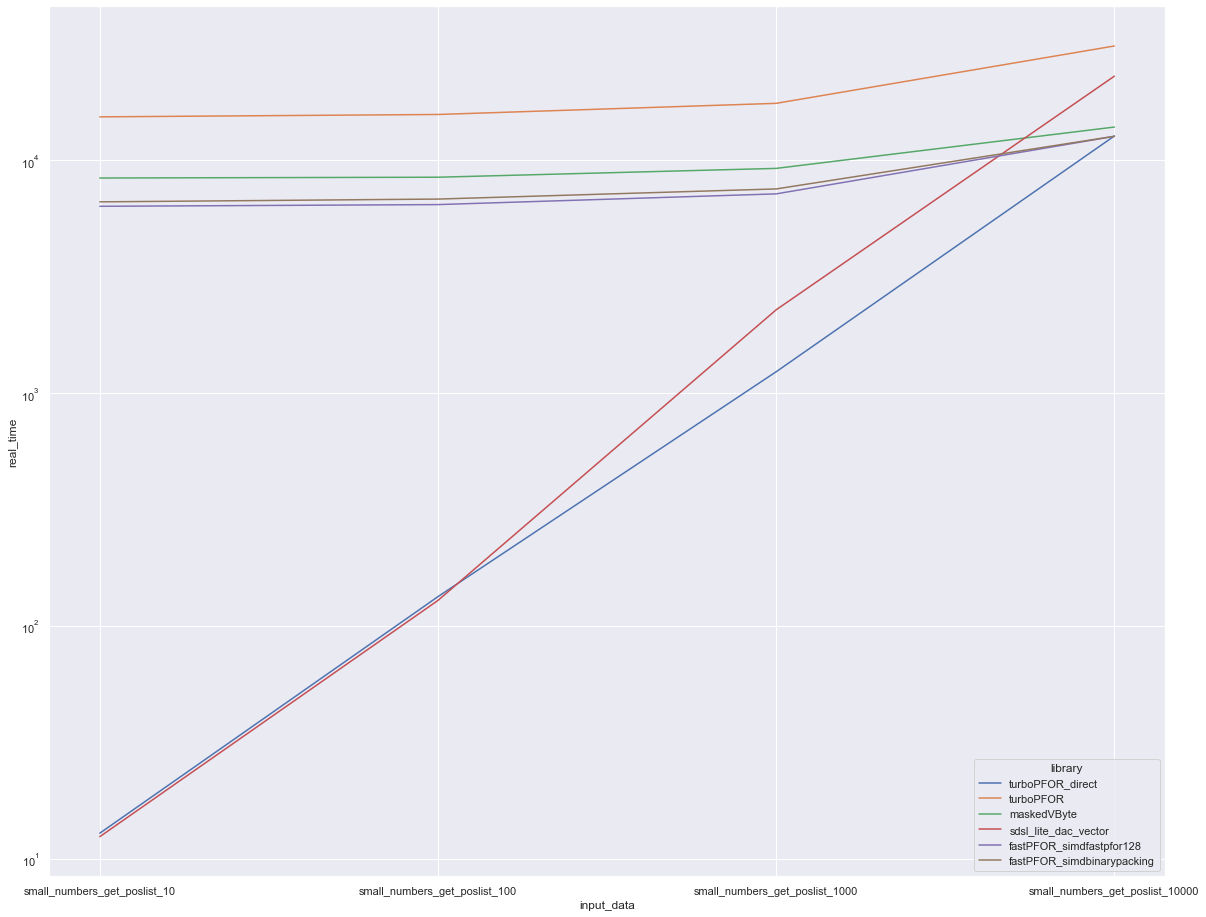

In [35]:
decoding_points: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "decoding_points"]
plot: sns.lineplot = sns.lineplot(data=decoding_points, x="input_data", y="real_time", hue="library")
plot.set_yscale("log")

## Compression

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

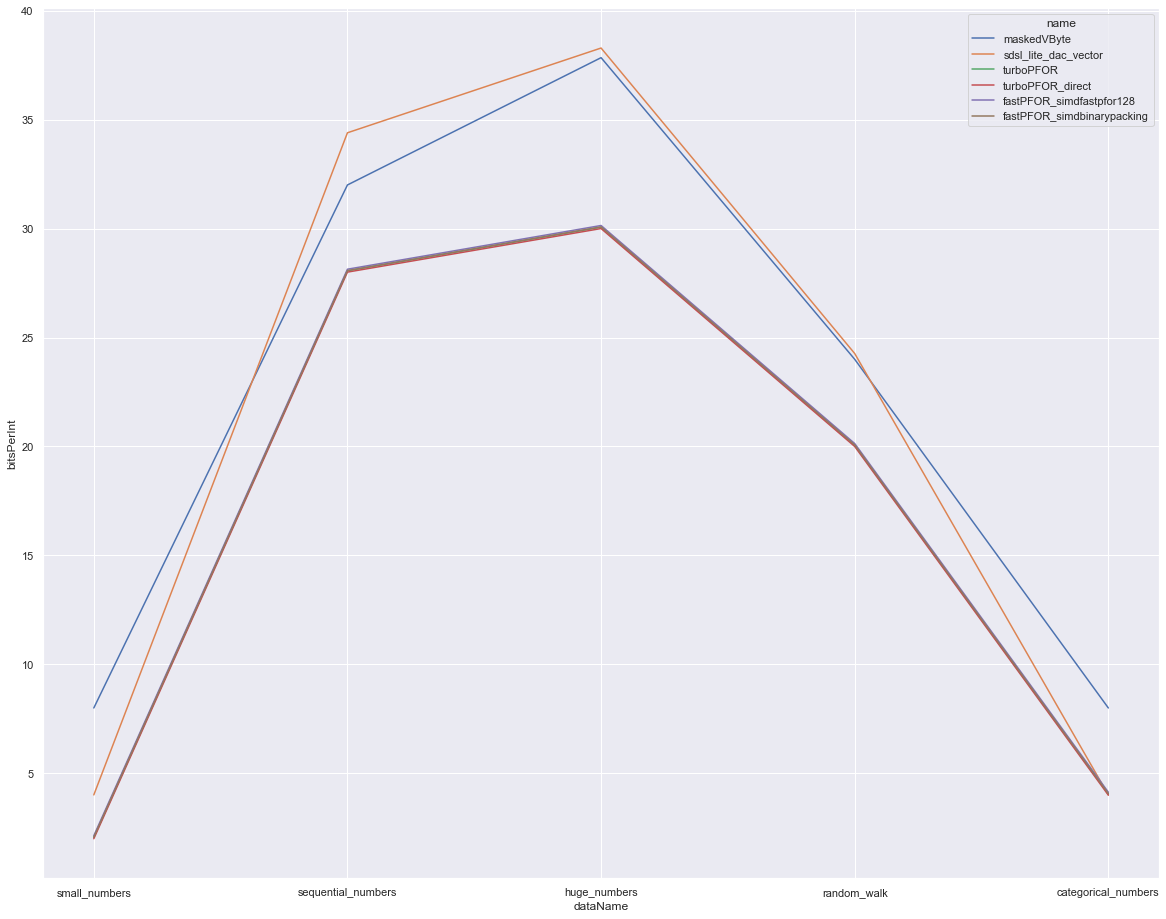

In [36]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].isin(dataset_filtered["library"])]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")